<a href="https://colab.research.google.com/github/Samy-OUABID/IAE-METZ-Samy-Yassin/blob/main/Examen_mod%C3%A9lisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install statsmodels arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.1 MB/s eta 0:00:00


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from arch import arch_model


In [110]:
#définition des fonds Small Caps

funds_Small_FRA = ["0P0000L1MW.F"]  # Fonds Small caps français
funds_Small_LUX = ["0P0001D3JX.F"]  # Fonds Small caps Luxembourgeois
benchmark_europe = "DJSC.L"  # Benchmark Small Caps Europe
benchmark_us = "^RUT" #Benchmark Small Caps Us

#liste complète des fonds à récupérer
all_funds = funds_Small_FRA + funds_Small_LUX + [benchmark_europe] + [benchmark_us]



In [111]:
#téléchargement des données sur 2 ans
fund_data = yf.download(all_funds, start="2023-01-01", end="2025-01-01")['Close']
fund_data_clean = fund_data.dropna()


[*********************100%***********************]  4 of 4 completed


In [112]:
#calcul des rendements quotidiens
fund_returns = fund_data_clean.pct_change().dropna()

print(fund_returns)

Ticker      0P0000L1MW.F  0P0001D3JX.F    DJSC.L      ^RUT
Date                                                      
2023-01-04      0.002624      0.010272  0.014248  0.012458
2023-01-05      0.007552      0.011816  0.004429 -0.010917
2023-01-06     -0.004749     -0.000815  0.005512  0.022593
2023-01-09      0.020430      0.016581  0.016308  0.001735
2023-01-10      0.002009      0.001069 -0.007686  0.014889
...                  ...           ...       ...       ...
2024-12-19     -0.012145     -0.012460 -0.014003 -0.004486
2024-12-20     -0.013979      0.013535  0.003017  0.009395
2024-12-23      0.008106     -0.002716  0.004035 -0.002199
2024-12-27      0.008654      0.004993  0.003361  0.003196
2024-12-30     -0.001931     -0.002484 -0.003059 -0.007489

[460 rows x 4 columns]


In [113]:
#calcul des rendements cumulés
cumulative_returns = (1 + fund_returns).cumprod() - 1

print(cumulative_returns)

Ticker      0P0000L1MW.F  0P0001D3JX.F    DJSC.L      ^RUT
Date                                                      
2023-01-04      0.002624      0.010272  0.014248  0.012458
2023-01-05      0.010195      0.022210  0.018741  0.001405
2023-01-06      0.005398      0.021377  0.024356  0.024030
2023-01-09      0.025938      0.038312  0.041061  0.025806
2023-01-10      0.028000      0.039422  0.033059  0.041080
...                  ...           ...       ...       ...
2024-12-19      0.045729      0.210161 -0.044944  0.268899
2024-12-20      0.031111      0.226541 -0.042062  0.280820
2024-12-23      0.039469      0.223209 -0.038197  0.278004
2024-12-27      0.048465      0.229317 -0.034964  0.282088
2024-12-30      0.046441      0.226263 -0.037916  0.272486

[460 rows x 4 columns]


In [159]:
#calcul des indicateurs de rentabilité
annual_returns = fund_returns.mean() * 252
annual_volatility = fund_returns.std() * np.sqrt(252)
free_rate = 0.02
sharpe_ratio = (annual_returns - free_rate) / annual_volatility


In [160]:
print(annual_returns)

Ticker
0P0000L1MW.F    0.035791
0P0001D3JX.F    0.122953
DJSC.L         -0.009090
^RUT            0.153964
dtype: float64


In [161]:
print(annual_volatility)


Ticker
0P0000L1MW.F    0.147886
0P0001D3JX.F    0.149558
DJSC.L          0.155476
^RUT            0.209837
dtype: float64


In [162]:
print(sharpe_ratio)

Ticker
0P0000L1MW.F    0.106780
0P0001D3JX.F    0.688384
DJSC.L         -0.187104
^RUT            0.638422
dtype: float64


In [163]:
#calcul de la covariance et du beta
cov_matrice = fund_returns.cov()
cov_avec_benchmark = cov_matrice[benchmark_europe]
var_benchmark = fund_returns[benchmark_europe].var()
beta_europe = cov_avec_benchmark / var_benchmark


In [165]:
#calcul de la covariance et du beta
cov_matrice = fund_returns.cov()
cov_avec_benchmark = cov_matrice[benchmark_us]
var_benchmark = fund_returns[benchmark_us].var()
beta_us = cov_avec_benchmark / var_benchmark


In [166]:
print(beta_europe)

Ticker
0P0000L1MW.F    0.528141
0P0001D3JX.F    0.180652
DJSC.L          1.000000
^RUT            0.625750
Name: DJSC.L, dtype: float64


In [167]:
print(beta_us)

Ticker
0P0000L1MW.F    0.197370
0P0001D3JX.F    0.104966
DJSC.L          0.343529
^RUT            1.000000
Name: ^RUT, dtype: float64


In [168]:
#calcul du ratio de Sortino
def sortino_ratio(returns, risk_free_rate=0.02):
    downside_returns = returns[returns < 0]
    downside_deviation = downside_returns.std() * np.sqrt(252)
    expected_return = returns.mean() * 252
    return (expected_return - risk_free_rate) / downside_deviation

sortino_ratios = fund_returns.apply(sortino_ratio)


In [169]:
print(sortino_ratios)


Ticker
0P0000L1MW.F    0.157074
0P0001D3JX.F    1.001064
DJSC.L         -0.265877
^RUT            1.082369
dtype: float64


In [170]:
#calcul de l'alpha de jensen
def alpha_jensen(fund_returns, benchmark_returns, risk_free_rate=0.02):
    common_dates = fund_returns.dropna().index.intersection(benchmark_returns.dropna().index)
    X = sm.add_constant(benchmark_returns.loc[common_dates])
    y = fund_returns.loc[common_dates]
    model = sm.OLS(y, X).fit()
    return model.params['const']

alpha_values = {fund: alpha_jensen(fund_returns[fund], fund_returns[benchmark_europe]) for fund in funds_Small_FRA + funds_Small_LUX}


In [171]:
print(alpha_values)

{'0P0000L1MW.F': 0.00016107985246490352, '0P0001D3JX.F': 0.0004944265319203441}


In [180]:
#calcul du maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

max_drawdowns = {fund: calculate_max_drawdown(cumulative_returns[fund]) for fund in cumulative_returns.columns}


In [181]:
print(max_drawdowns)

{'0P0000L1MW.F': -1.4666263645384017, '0P0001D3JX.F': -1.0483192486005342, 'DJSC.L': -1.6877730321863036, '^RUT': -1.4507427452925936}


In [182]:
garch_results = {}
for fund in funds_Small_FRA + funds_Small_LUX:
    model = arch_model(fund_returns[fund].dropna(), vol='Garch', p=1, q=1)
    garch_results[fund] = model.fit(disp='off')

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.66e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.857e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [191]:
#dictionnaire pour renommer les lignes
fund_names = {
    "0P0000L1MW.F": "Fonds Small Caps FRA",
    "0P0001D3JX.F": "Fonds Small Caps LUX",
    "DJSC.L": "Benchmark Small Caps Europe",
    "^RUT": "Benchmark Small Caps US"
}

final_indicators = pd.DataFrame({
    'Rendement Annuel': annual_returns,
    'Volatilité Annuelle': annual_volatility,
    'Sharpe Ratio': sharpe_ratio,
    'Alpha de Jensen': pd.Series(alpha_values),
    'Bêta': betas,
    'Ratio de Sortino': sortino_ratios,
    'Maximum Drawdown': pd.Series(max_drawdowns)
})
final_indicators = final_indicators.rename(index=index_names)
print("\nTableau récapitulatif des indicateurs :")
print(final_indicators)




Tableau récapitulatif des indicateurs :
                             Rendement Annuel  Volatilité Annuelle  \
Fonds Small Caps FRA                 0.035791             0.147886   
Fonds Small Caps LUX                 0.122953             0.149558   
Benchmark Small Caps Europe         -0.009090             0.155476   
Benchmark Small Caps US              0.153964             0.209837   

                             Sharpe Ratio  Alpha de Jensen      Bêta  \
Fonds Small Caps FRA             0.106780         0.000161  0.528141   
Fonds Small Caps LUX             0.688384         0.000494  0.180652   
Benchmark Small Caps Europe     -0.187104              NaN  1.000000   
Benchmark Small Caps US          0.638422              NaN  0.625750   

                             Ratio de Sortino  Maximum Drawdown  
Fonds Small Caps FRA                 0.157074         -1.466626  
Fonds Small Caps LUX                 1.001064         -1.048319  
Benchmark Small Caps Europe         -0.265877    

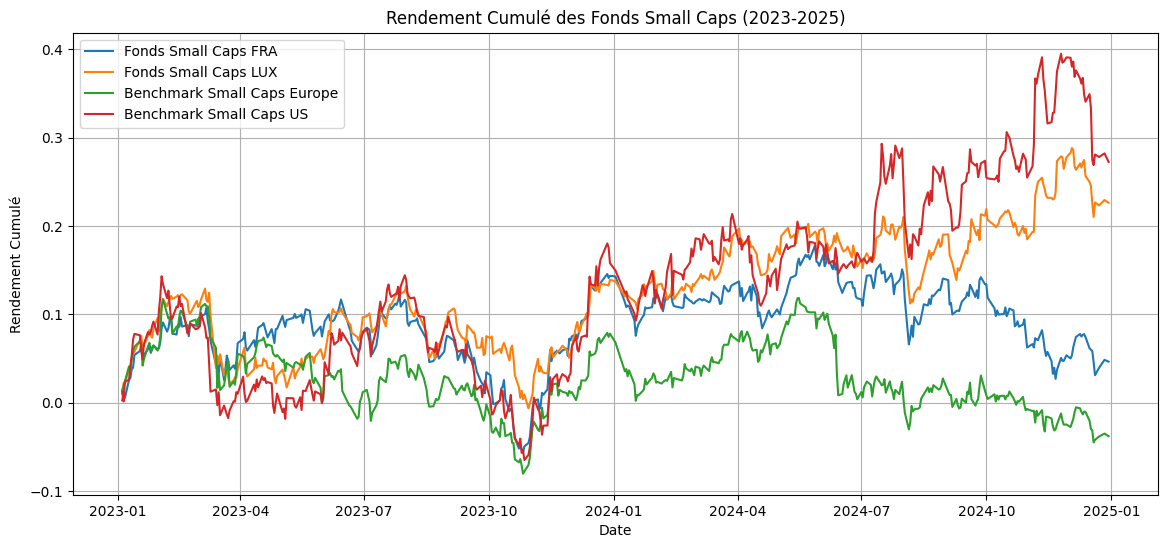

In [192]:
#courbe des rendements cumulés
fund_names = {
    "0P0000L1MW.F": "Fonds Small Caps FRA",
    "0P0001D3JX.F": "Fonds Small Caps LUX",
    "DJSC.L": "Benchmark Small Caps Europe",
    "^RUT": "Benchmark Small Caps US"
}
plt.figure(figsize=(14, 6))
for fund in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[fund], label=fund_names.get(fund, fund))
plt.title("Rendement Cumulé des Fonds Small Caps (2023-2025)")
plt.xlabel("Date")
plt.ylabel("Rendement Cumulé")
plt.legend()
plt.grid(True)
plt.show()


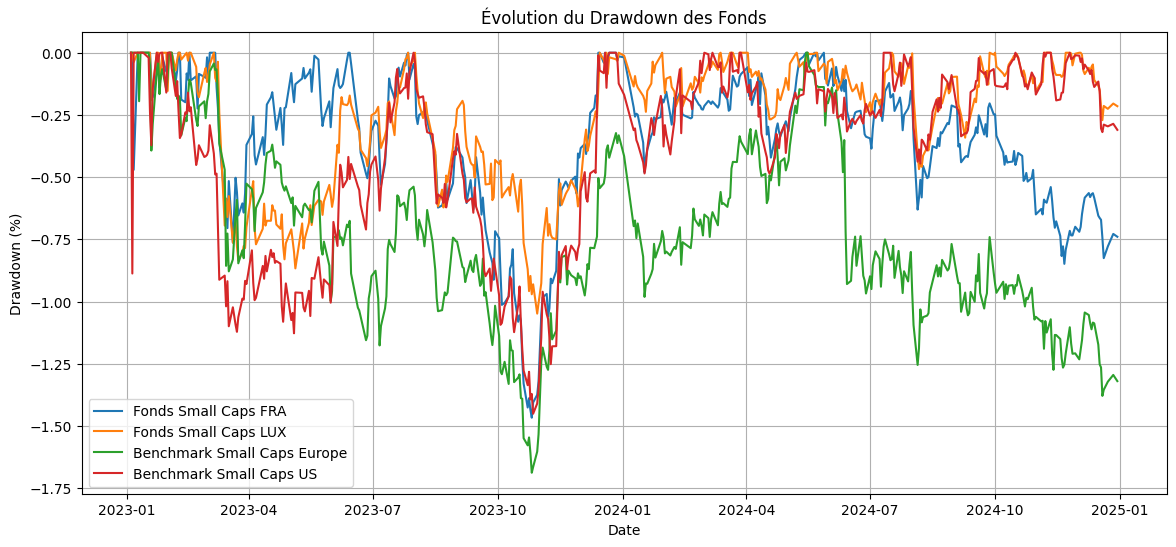

In [195]:
#visualisation du drawdown
fund_names = {
    "0P0000L1MW.F": "Fonds Small Caps FRA",
    "0P0001D3JX.F": "Fonds Small Caps LUX",
    "DJSC.L": "Benchmark Small Caps Europe",
    "^RUT": "Benchmark Small Caps US"
}
plt.figure(figsize=(14, 6))
for fund in cumulative_returns.columns:
    peak = cumulative_returns[fund].cummax()
    drawdown = (cumulative_returns[fund] - peak) / peak
    plt.plot(drawdown, label=fund_names.get(fund, fund))
plt.title("Évolution du Drawdown des Fonds")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.legend()
plt.grid(True)
plt.show()


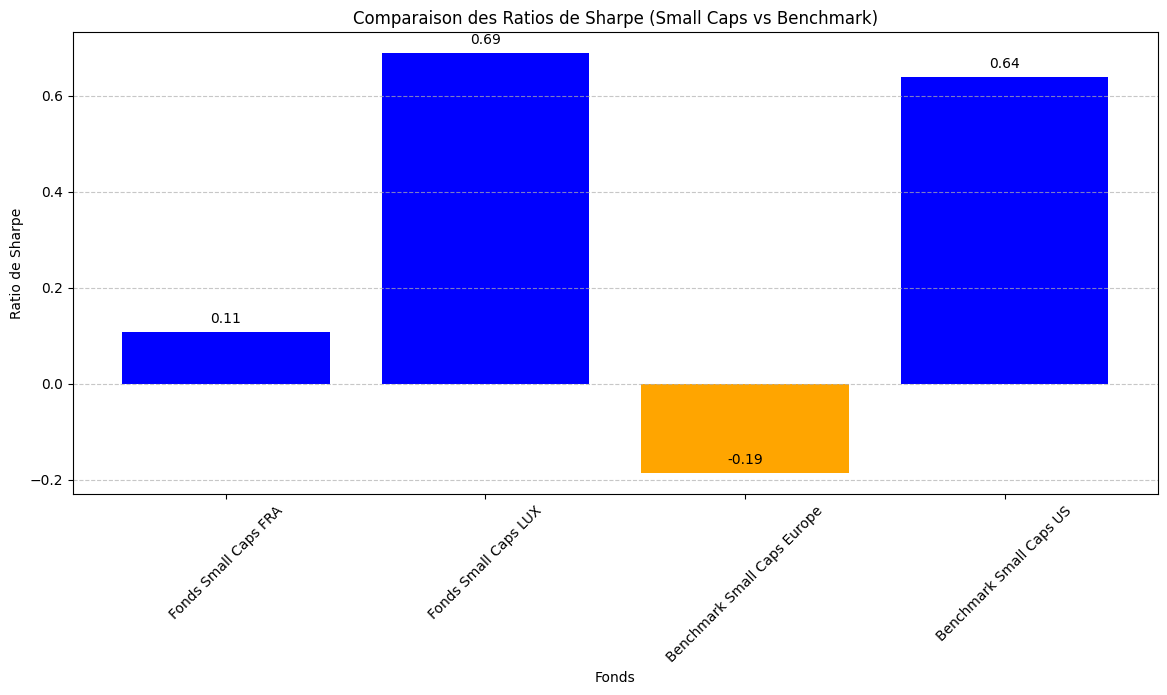

In [196]:
#visualisation des ratios de sharpe
fund_names = {
    "0P0000L1MW.F": "Fonds Small Caps FRA",
    "0P0001D3JX.F": "Fonds Small Caps LUX",
    "DJSC.L": "Benchmark Small Caps Europe",
    "^RUT": "Benchmark Small Caps US"
}
plt.figure(figsize=(14, 6))
sharpe_df = pd.DataFrame({
    'Fonds': [fund_names.get(fund, fund) for fund in all_funds],
    'Sharpe Ratio': [sharpe_ratio[fund] for fund in funds_Small_FRA + funds_Small_LUX + [benchmark_europe] + [benchmark_us]]
})
plt.bar(sharpe_df['Fonds'], sharpe_df['Sharpe Ratio'], color=['blue'] * len(funds_Small_FRA + funds_Small_LUX) + ['orange'])
plt.title("Comparaison des Ratios de Sharpe (Small Caps vs Benchmark)")
plt.ylabel("Ratio de Sharpe")
plt.xlabel("Fonds")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(sharpe_df['Sharpe Ratio']):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)
plt.show()


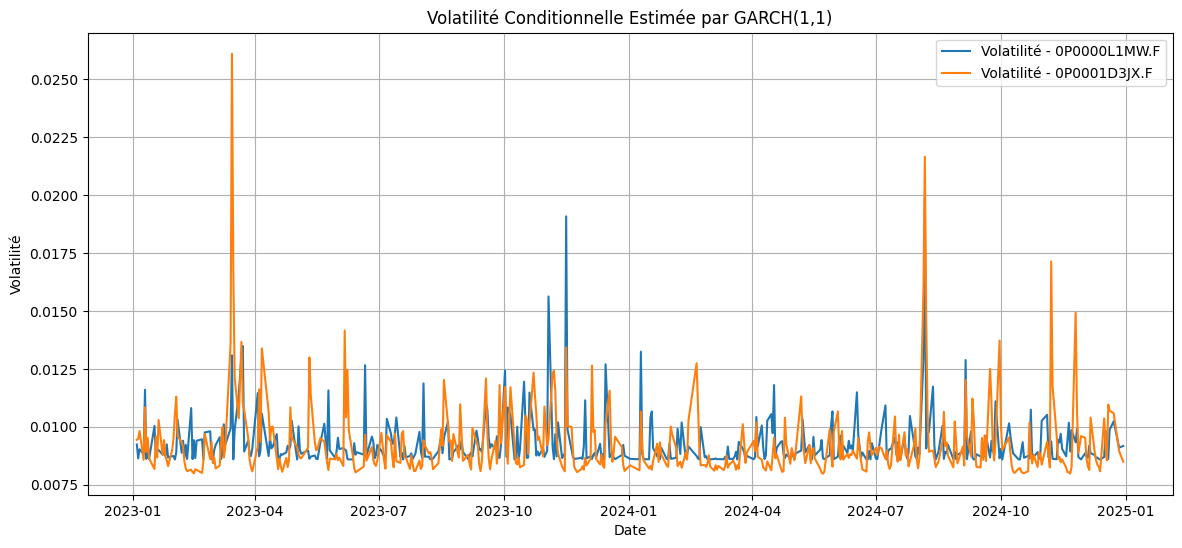

In [189]:
#visualisation de la volatilité conditionnelle
plt.figure(figsize=(14, 6))
for fund in funds_Small_FRA + funds_Small_LUX:
    plt.plot(garch_results[fund].conditional_volatility, label=f"Volatilité - {fund}")
plt.title("Volatilité Conditionnelle Estimée par GARCH(1,1)")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.legend()
plt.grid(True)
plt.show()